# Linear Regression

In [1822]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 


### Data Preprocessing

In [1823]:
df = pd.read_csv('../flight-delay-dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [1824]:
# Remove NAs
df.isna().sum()
df.dropna(inplace=True)

In [1825]:
# Remove NAs
df.isna().sum()
df.dropna(inplace=True)

In [1826]:
# Remove TAIL_NUM and TAXI_OUT
df.drop(columns=['TAIL_NUM', 'TAXI_OUT', 'DEP_TIME_M'], inplace=True)

In [1827]:
# Convert DEW_POINT to int
df['Dew Point'] = df['Dew Point'].astype(int)

In [1828]:
# Encode categorical variables
columns_to_encode = ['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [1829]:
# Remove all values beyond 3 standard deviations from the mean
mean_dep_delay = df_encoded['DEP_DELAY'].mean()
std_dep_delay = df_encoded['DEP_DELAY'].std()
upper_threshold = mean_dep_delay + (3 * std_dep_delay)
df_encoded = df_encoded[df_encoded['DEP_DELAY'] <= upper_threshold]

# # Remove all values beyond 3*IQR
# Q1 = df_encoded['DEP_DELAY'].quantile(0.25)
# Q3 = df_encoded['DEP_DELAY'].quantile(0.75)
# IQR = Q3 - Q1
# lower_threshold = Q1 - (3 * IQR)
# upper_threshold = Q3 + (3 * IQR)
# df_encoded = df_encoded[df_encoded['DEP_DELAY'] <= upper_threshold]
# df_encoded = df_encoded[df_encoded['DEP_DELAY'] >= lower_threshold]


# Remove all values below 0
df_encoded = df_encoded[df_encoded['DEP_DELAY'] >= 15]

### Data Normalization

No method produces:
MSE: 714.5088685673621
MAE: 21.892322984188578

In [1830]:
# # Test log method

# # Log-transform the target variable
# df_encoded['DEP_DELAY'] = np.log1p(df_encoded['DEP_DELAY'])

# # Separate features (X) and target (y)
# X = df_encoded.drop(columns=['DEP_DELAY'])
# y = df_encoded['DEP_DELAY']

# # Apply MinMax scaling to all features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Convert back to DataFrame (optional)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Train Linear Regression Model
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# # Predict on the test set (log scale)
# y_pred_log = lm.predict(X_test)

# # Reverse log transformation (convert back to original scale)
# y_pred = np.expm1(y_pred_log)
# y_test_original = np.expm1(y_test)

# # Calculate MSE
# mse = mean_squared_error(y_test_original, y_pred)
# print("MSE:", mse)

# # Calculate MAE
# mae = mean_absolute_error(y_test_original, y_pred)
# print("MAE:", mae)


# # Produces:
# # MSE: 731.9555235013917
# # MAE: 20.56363831986314

In [1831]:
# # Test Squareroot method

# # Square root transform the target variable
# df_encoded['DEP_DELAY'] = np.sqrt(df_encoded['DEP_DELAY'])

# # Separate features (X) and target (y)
# X = df_encoded.drop(columns=['DEP_DELAY'])
# y = df_encoded['DEP_DELAY']

# # Apply MinMax scaling to all features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Convert back to DataFrame (optional)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Train Linear Regression Model
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# # Predict on the test set (square root scale)
# y_pred_sqrt = lm.predict(X_test)

# # Reverse square root transformation (convert back to original scale)
# y_pred = np.square(y_pred_sqrt)
# y_test_original = np.square(y_test)

# # Calculate MSE
# mse = mean_squared_error(y_test_original, y_pred)
# print("MSE:", mse)

# # Calculate MAE
# mae = mean_absolute_error(y_test_original, y_pred)
# print("MAE:", mae)

# # Produces:
# # MSE: 712.697631746199
# # MAE: 21.075307053035456

### Train/Test Split

In [1832]:
# Split 80/20 train-test

X = df_encoded.drop(columns=['DEP_DELAY'])
y = df_encoded['DEP_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Develop and Fit Model

In [1833]:
# Find MSE if you were to predict all with the average
y_mean = y_train.mean()
y_train_pred_mean = np.full(y_train.shape, y_mean)
y_test_pred_mean = np.full(y_test.shape, y_mean)
mse_train_mean = mean_squared_error(y_train, y_train_pred_mean)
mse_test_mean = mean_squared_error(y_test, y_test_pred_mean)
mae_train_mean = mean_absolute_error(y_train, y_train_pred_mean)
mae_test_mean = mean_absolute_error(y_test, y_test_pred_mean)
print(f'Mean MSE Train: {mse_train_mean}, Mean MSE Test: {mse_test_mean}')
print(f'Mean MAE Train: {mae_train_mean}, Mean MAE Test: {mae_test_mean}')

Mean MSE Train: 736.7754516126444, Mean MSE Test: 726.0180249932113
Mean MAE Train: 22.05603126579942, Mean MAE Test: 22.20996029186083


In [1834]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
y_pred = lm.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MSE: 714.5088685673621
MAE: 21.892322984188578


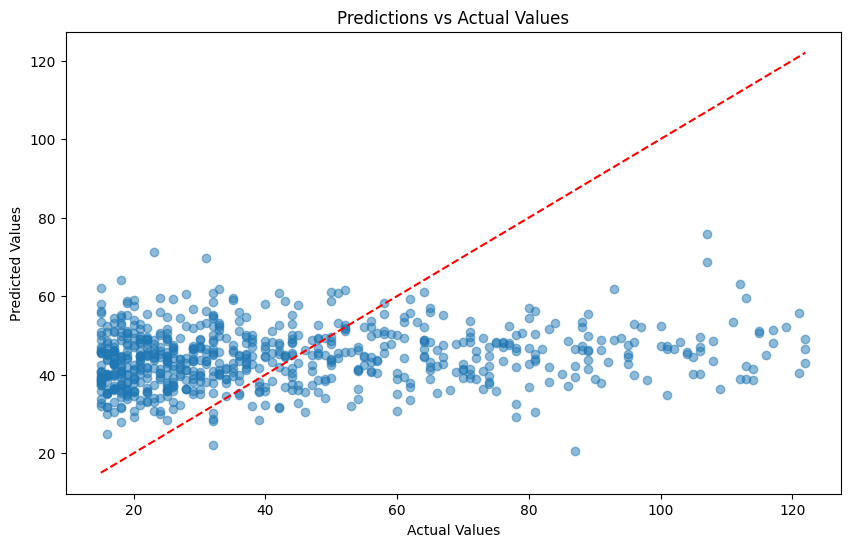

In [1835]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()

### Feature Selection

In [1836]:

# Get Feature Importance from Linear Regression
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lm.coef_  # Coefficients as importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance from Linear Regression (Top to Bottom):")
print(feature_importance_lr)


Feature Importance from Linear Regression (Top to Bottom):
                          Feature  Importance
20           OP_UNIQUE_CARRIER_HA   16.558051
68                       DEST_PSE   14.719085
108      Condition_Cloudy / Windy   14.221701
32                       DEST_BUR   12.019756
122  Condition_Light Snow / Windy   11.658545
..                            ...         ...
112                 Condition_Fog  -12.166398
113         Condition_Fog / Windy  -12.678431
128        Condition_Rain / Windy  -14.757301
85                       DEST_SRQ  -17.545556
58                       DEST_OAK  -19.433224

[132 rows x 2 columns]


In [1837]:
# Get the absolute values of the coefficients
feature_importance_lr['Absolute_Importance'] = abs(feature_importance_lr['Importance'])

# Sort the features by absolute importance
feature_importance_lr_sorted = feature_importance_lr.sort_values(by='Absolute_Importance', ascending=False)

# Display sorted feature importance
print("Sorted Feature Importance (by absolute values):")
print(feature_importance_lr_sorted)

Sorted Feature Importance (by absolute values):
                           Feature    Importance  Absolute_Importance
58                        DEST_OAK -1.943322e+01         1.943322e+01
85                        DEST_SRQ -1.754556e+01         1.754556e+01
20            OP_UNIQUE_CARRIER_HA  1.655805e+01         1.655805e+01
128         Condition_Rain / Windy -1.475730e+01         1.475730e+01
68                        DEST_PSE  1.471908e+01         1.471908e+01
..                             ...           ...                  ...
109      Condition_Drizzle and Fog -1.776357e-15         1.776357e-15
115   Condition_Heavy Rain / Windy -1.665335e-15         1.665335e-15
131   Condition_Wintry Mix / Windy  0.000000e+00         0.000000e+00
129                 Condition_Snow  0.000000e+00         0.000000e+00
118  Condition_Light Freezing Rain  0.000000e+00         0.000000e+00

[132 rows x 3 columns]


In [1838]:
# Define thresholds
thresholds = [0.1, 2, 3, 4, 5, 10, 12]

# Loop through thresholds and print the selected features
for threshold in thresholds:
    selected_features = feature_importance_lr_sorted[feature_importance_lr_sorted['Absolute_Importance'] >= threshold]
    
    # Print total number of columns after applying threshold
    print(f"Threshold: {threshold}")
    print(f"Total columns selected: {len(selected_features)}")
    print(f"Selected features: {selected_features['Feature'].tolist()}")
    print("-" * 50)
    
    # Filter dataset with selected features
    X_train_selected = X_train[selected_features['Feature']]
    X_test_selected = X_test[selected_features['Feature']]

Threshold: 0.1
Total columns selected: 118
Selected features: ['DEST_OAK', 'DEST_SRQ', 'OP_UNIQUE_CARRIER_HA', 'Condition_Rain / Windy', 'DEST_PSE', 'Condition_Cloudy / Windy', 'Condition_Fog / Windy', 'Condition_Fog', 'DEST_BUR', 'Condition_Light Snow / Windy', 'DEST_ORH', 'DEST_BQN', 'Condition_Heavy Rain', 'DEST_ABQ', 'DEST_SAT', 'DEST_EGE', 'DEST_CHS', 'DEST_RNO', 'Condition_Light Drizzle / Windy', 'DEST_ONT', 'DEST_SAV', 'DEST_CVG', 'Condition_Fair / Windy', 'Condition_Light Rain / Windy', 'DEST_PHL', 'DEST_SJU', 'DEST_RIC', 'DEST_BWI', 'Condition_Light Snow', 'DEST_SJC', 'DEST_SLC', 'DEST_ORD', 'DEST_JAC', 'DEST_PSP', 'OP_UNIQUE_CARRIER_DL', 'DEST_RSW', 'DEST_DTW', 'Pressure', 'OP_UNIQUE_CARRIER_OO', 'Condition_Rain', 'DEST_FLL', 'DEST_IAH', 'Condition_Partly Cloudy / Windy', 'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_9E', 'Wind_W', 'Wind_ENE', 'DEST_BNA', 'Wind_NE', 'DEST_PWM', 'DEST_MCO', 'DEST_JAX', 'Condition_Light Drizzle', 'Condition_Wintry Mix', 'DEST_CLE', 'Wind_N', 'DEST

In [1839]:
# Assuming feature_importance_lr_sorted is the DataFrame with feature importances
selected_features = feature_importance_lr_sorted[feature_importance_lr_sorted['Absolute_Importance'] >= 0.1]['Feature'].tolist()

# Filter the training and testing sets to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain Linear Regression on selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)

# Evaluate new model
y_pred_selected = lr_selected.predict(X_test_selected)

# Calculate MSE (Mean Squared Error) for the new model
mse_selected = mean_squared_error(y_test, y_pred_selected)

print("MSE (Selected Features):", mse_selected)


MSE (Selected Features): 708.8335569680428


### Feature Standardization

In [1840]:
# Print mean and std before scaling
print("Before scaling - X_train mean:\n", X_train.mean())
print("Before scaling - X_train std:\n", X_train.std())

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Note that we only use 'transform' on the test set

# Print mean and std after scaling
print("After scaling - X_train mean:\n", X_train_scaled.mean(axis=0))
print("After scaling - X_train std:\n", X_train_scaled.std(axis=0))

# Initialize Linear Regression model
lm = LinearRegression()

# Fit the model on the scaled data
lm.fit(X_train_scaled, y_train)

# Make predictions on the test set (scaled)
y_pred = lm.predict(X_test_scaled)

# Calculate MSE (Mean Squared Error) on the original scale
mse = mean_squared_error(y_test, y_pred)
print("MSE (Original scale):", mse)

# Calculate MAE (Mean Absolute Error) on the original scale
mae = mean_absolute_error(y_test, y_pred)
print("MAE (Original scale):", mae)

# Result:
# MSE (Original scale): 714.5172329675304
# MAE (Original scale): 21.89232298418855

Before scaling - X_train mean:
 MONTH                              8.633853
DAY_OF_MONTH                      15.240793
DAY_OF_WEEK                        4.072946
CRS_ELAPSED_TIME                 220.190156
DISTANCE                        1232.118980
                                   ...     
Condition_Rain                     0.026558
Condition_Rain / Windy             0.001062
Condition_Snow                     0.000000
Condition_Wintry Mix               0.006020
Condition_Wintry Mix / Windy       0.000000
Length: 132, dtype: float64
Before scaling - X_train std:
 MONTH                             4.809050
DAY_OF_MONTH                      8.510964
DAY_OF_WEEK                       2.053739
CRS_ELAPSED_TIME                117.467911
DISTANCE                        867.244364
                                   ...    
Condition_Rain                    0.160816
Condition_Rain / Windy            0.032582
Condition_Snow                    0.000000
Condition_Wintry Mix              0.07

### Ridge Regression

In [1841]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split your data into train/test (already done, but just a reminder)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Ridge Regression model
ridge = Ridge(alpha=1)  # alpha = 1 gives best result

# Fit the model
ridge.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", ridge.intercept_)
coef_df_ridge = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print(coef_df_ridge)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
from sklearn import metrics
print(f"Mean Squared Error (Test Set): {metrics.mean_squared_error(y_test, y_pred)}")
# Calculate MAE (Mean Absolute Error) on the original scale
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


Intercept: 187.9105795747006
                              Coefficient
MONTH                            0.108246
DAY_OF_MONTH                    -0.097670
DAY_OF_WEEK                      0.286937
CRS_ELAPSED_TIME                 0.152699
DISTANCE                        -0.021475
...                                   ...
Condition_Rain                  -3.827681
Condition_Rain / Windy         -10.921276
Condition_Snow                   0.000000
Condition_Wintry Mix             2.928402
Condition_Wintry Mix / Windy     0.000000

[132 rows x 1 columns]
Mean Squared Error (Test Set): 712.1712262088602
MAE: 21.850166851368485


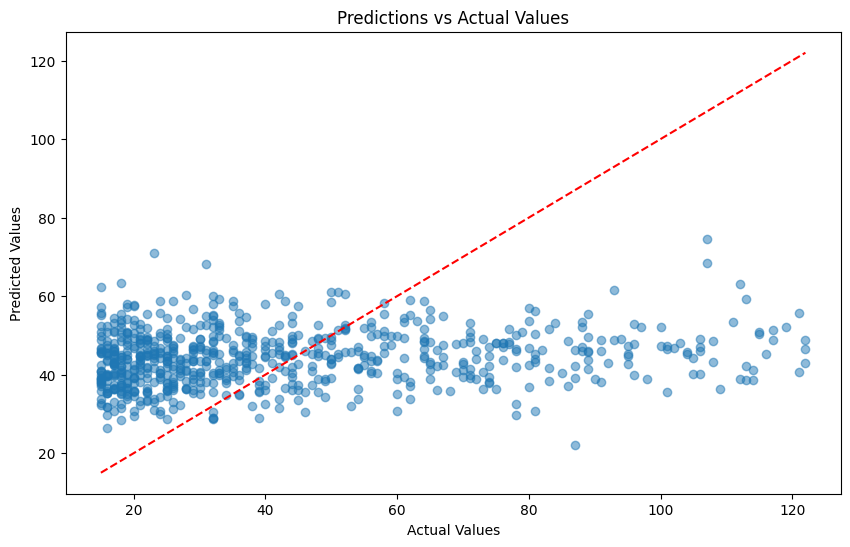

In [1842]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()

### Lasso Regression

In [1843]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split



# Create the Lasso Regression model
lasso = Lasso(alpha=0.1) # Alpha 0.1 - 0.9 has little change in output

# Fit the model
lasso.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", lasso.intercept_)
coef_df_lasso = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(coef_df_lasso)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
from sklearn import metrics
print(f"Mean Squared Error (Test Set): {metrics.mean_squared_error(y_test, y_pred)}")
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

Intercept: 113.18236439573717
                              Coefficient
MONTH                            0.032347
DAY_OF_MONTH                    -0.080118
DAY_OF_WEEK                      0.115434
CRS_ELAPSED_TIME                 0.048606
DISTANCE                        -0.007151
...                                   ...
Condition_Rain                  -0.000000
Condition_Rain / Windy          -0.000000
Condition_Snow                   0.000000
Condition_Wintry Mix             0.000000
Condition_Wintry Mix / Windy     0.000000

[132 rows x 1 columns]
Mean Squared Error (Test Set): 699.7205025020062
MAE: 21.73873523830606


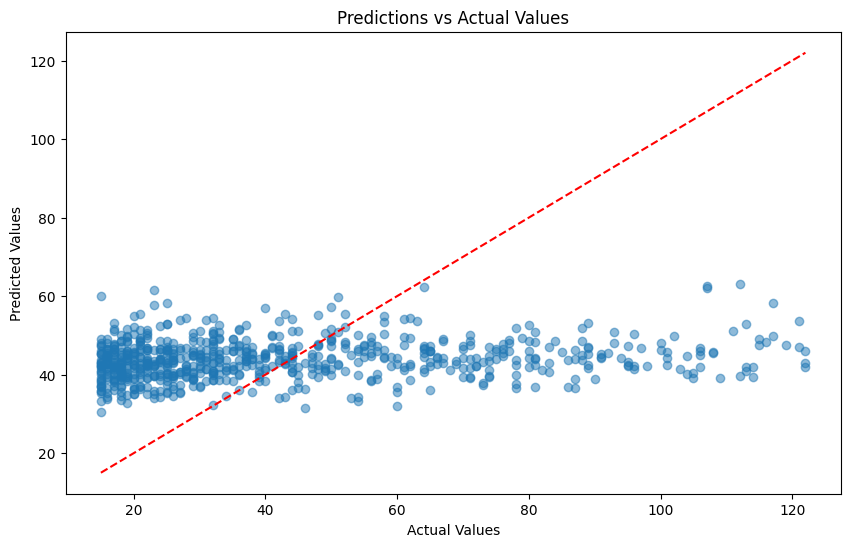

In [1844]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()